Test of STARS module, noise now put in function. Helper functions to get $\mu_*$ and $h$ added.

In [6]:
import numpy as np
import dfo
import matplotlib.pyplot as plt

In [7]:
def tfun(x,var=1E-4):
    return np.dot(x[0:2],x[0:2])+1E-2*np.random.randn(1)

dim=12
xinit=200*np.random.rand(dim)-100
#my nasty initial condition, but all others will plateau
#xinit[0]=100
#xinit[1]=.1
##setup
print(tfun(xinit))

[7635.4299276]


In [8]:
mu_star=dfo.get_mu_star(1E-4,2,dim)
h=dfo.get_h(2,dim)

x=np.copy(xinit)
maxit=400
xhist=np.copy(x)
fhist=tfun(x)
for i in range(maxit):
    [x,f,y,fy]=dfo.STARS(x,tfun,mu_star,h)
    xhist=np.vstack((xhist,x))
    fhist=np.hstack((fhist,f))
    if 'yhist' in locals():
        yhist=np.vstack((yhist,y))
        ghist=np.hstack((ghist,fy))
    else:
        yhist=np.copy(y)
        ghist=np.copy(fy)
        
 

[0.70710678 0.70710678 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


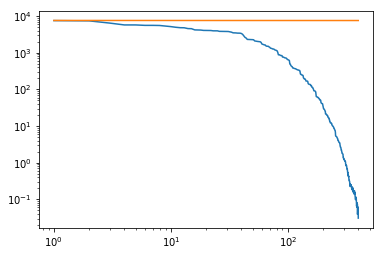

In [11]:
#now use active subspace, known  
x2=np.copy(xinit)
x2hist=np.copy(x2)
f2hist=tfun(x2)
mu_star=dfo.get_mu_star(1E-4,2,1)
h=dfo.get_h(2,1)
u=np.zeros(dim)
u[0:2]=1
u*=1/np.sqrt(2)
print(u)
for i in range(maxit):
    [x2,f,temp,temp2]=dfo.STARS_RV(x2,tfun,u,mu_star,h)
    x2hist=np.vstack((x2hist,x2))
    f2hist=np.hstack((f2hist,f))
    
plt.loglog(fhist)
plt.loglog(f2hist)
plt.show()

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


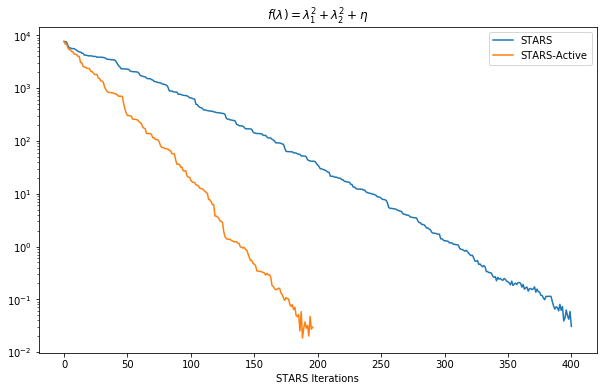

In [32]:
mu_star=dfo.get_mu_star(1E-4,2,2)
h=dfo.get_h(2,2)
x3=np.copy(xinit)
xhist3=np.copy(x3)
fhist3=tfun(x3)
active=np.eye(dim)
active=active[0:2,:]
print(active)
for i in range(maxit):
    [x3,f,temp1,temp2]=dfo.STARS(x3,tfun,mu_star,h,active=active)
    xhist3=np.vstack((xhist3,x3))
    fhist3=np.hstack((fhist3,f))
    if f<1E-2:
        break
plt.figure(figsize=(10,6))
plt.semilogy(fhist,label='STARS')    
plt.semilogy(fhist3,label='STARS-Active')
plt.legend()
plt.title('$f(\lambda)=\lambda_1^2+\lambda_2^2+\eta $')
plt.xlabel('STARS Iterations')
plt.savefig('STARS_det.eps')
plt.show()

n should be an integer. Performing conversion.
63.36027901519417
[62.76505837] 0
[66.76162526] 1
active dimensions 2
n should be an integer. Performing conversion.
7.985942733259582
[4.06939166] 0
[8.0694823] 1
active dimensions 2
n should be an integer. Performing conversion.
7.601383972738426
[4.02577932] 0
[8.02512783] 1
active dimensions 2
n should be an integer. Performing conversion.
7.418135674673262
[4.00872561] 0
[8.00935279] 1
active dimensions 2
n should be an integer. Performing conversion.
7.229544846032463
[4.0008543] 0
[8.00052974] 1
active dimensions 2
n should be an integer. Performing conversion.
7.267763846990508
[4.0009489] 0
[8.00071169] 1
active dimensions 2
n should be an integer. Performing conversion.
7.252970085548688
[4.0015497] 0
[8.00120062] 1
active dimensions 2
n should be an integer. Performing conversion.
7.247299373014491
[4.00103229] 0
[8.00079725] 1
active dimensions 2
n should be an integer. Performing conversion.
7.252458141298494
[4.00049481] 0
[8

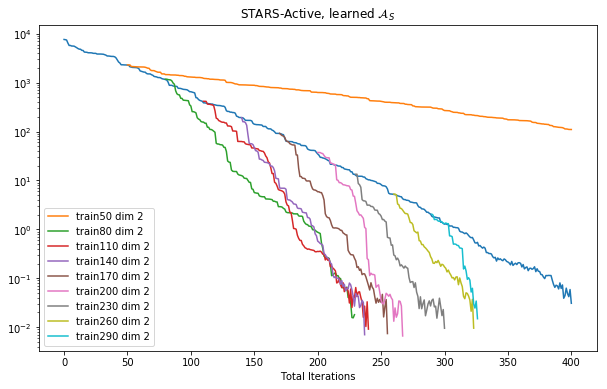

In [31]:
import active_subspaces as ac
import matplotlib.pyplot as plt
ss = ac.subspaces.Subspaces()
mu_star=dfo.get_mu_star(1E-4,2,3)
h=dfo.get_h(2,3)
plt.figure(figsize=(10,6))
plt.semilogy(fhist)

for tr_stop in range(50,300,30):


    trainx=np.vstack((xhist[0:tr_stop,:],yhist[0:tr_stop,:]))
    trainf=np.hstack((fhist[0:tr_stop],ghist[0:tr_stop]))
    trainf=np.reshape(trainf,(trainf.size,1))


# Instantiate a subspace object


# Use Local Linears
#df = ac.gradients.local_linear_gradients(x_hist, f_hist) #Estimated gradients using local linear models
#ss.compute(df=df, nboot=0)
    
# Use Global Quadratic
    ss.compute(X=trainx, f=trainf, nboot=0, sstype='QPHD')

    tot=np.sum(ss.eigenvals)
    sum=.9*tot
    print(sum)
    temp=0
    for i in range(ss.eigenvals.size):
        temp+=ss.eigenvals[i]
        print(temp,i)
        if temp>=sum:
            as_ind=i
            break
    sub=ss.eigenvecs[:,0:as_ind+1]
    print('active dimensions',as_ind+1)
    mu_star=dfo.get_mu_star(1E-4,2,as_ind+1)
    h=dfo.get_h(2,as_ind+1)
    #print(ss.eigenvecs[0:4])
    #print('Size ',trainf.size,'Eigs ',ss.eigenvals[0:6])
    
    x4=np.copy(xhist[tr_stop-1,:])
    xhist4=np.copy(x4)
    fhist4=tfun(x4)
#active=np.eye(dim)
    active=sub.transpose()
#print(active)
    for i in range(400-tr_stop):
        [x4,f,temp,temp2]=dfo.STARS(x4,tfun,mu_star,h,active=active)
        xhist4=np.vstack((xhist4,x4))
        fhist4=np.hstack((fhist4,f))
        if f<1E-2:
            break
    plt.semilogy(range(tr_stop,tr_stop+fhist4.size),fhist4,label='train'+str(tr_stop)+' dim '+str(as_ind+1))
plt.xlabel('Total Iterations')
plt.title('STARS-Active, learned $\mathcal{A}_S$')
plt.legend()
plt.savefig('STARS_learned.eps')
plt.show()



In [ ]:
plt.scatter(xhist[:,0],xhist[:,1])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.semilogy(range(tr_stop,tr_stop+301),fhist4)
plt.semilogy(fhist)
plt.show()



In [ ]:
mu_star=dfo.get_mu_star(1E-4,2,2)
h=dfo.get_h(2,2)
x4=np.copy(xhist[70,:])
xhist4=np.copy(x4)
fhist4=tfun(x4)
active=np.eye(dim)
active=active[0:2,:]
print(active)
for i in range(maxit-70):
    [x4,f,temp,temp2]=dfo.STARS(x4,tfun,mu_star,h,active=active)
    xhist4=np.vstack((xhist4,x4))
    fhist4=np.hstack((fhist4,f))

In [ ]:
import matplotlib.pyplot as plt
plt.semilogy(fhist,label='stars_full')
plt.semilogy(f2hist,label='stars_onedir')
plt.semilogy(fhist3,label='stars_active')
plt.semilogy(fhist4,label='stars_learn')
plt.legend()
plt.show()
print(f2hist)

In [ ]:
#plt.scatter(xhist[0],xhist[1])
plt.scatter(x2hist[:,0],x2hist[:,1])
plt.scatter(xhist3[:,0],xhist3[:,1])

print(x2hist[0])
print(x2hist[1])
print(x2hist[-1])

plt.show()




Test of Active Stars on DCI problem:

$$ S(\lambda) = \frac{1}{2} (A\lambda - d)C_\mathcal{D}^{-1}(A\lambda - d) +